# Preamble

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
%matplotlib inline

In [5]:
sarcasm = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Sarcasm_Headlines_Dataset.json', lines=True)
sarcasm2 = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Sarcasm_Headlines_Dataset_v2.json', lines=True)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
sarcasm.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [8]:
sarcasm2.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [9]:
sarcasm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


# Data Normalisation

In [10]:
print(sarcasm.isnull().sum())
sarcasm2.isnull().sum()


article_link    0
headline        0
is_sarcastic    0
dtype: int64


is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [11]:
sarcasm.drop('article_link', axis=1, inplace=True)
sarcasm2.drop('article_link', axis=1, inplace=True)

In [12]:
sarcasm.isnull().sum()

headline        0
is_sarcastic    0
dtype: int64

In [13]:
sarcasm.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [14]:
sarcasm2.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


In [15]:
label_quality = LabelEncoder()

In [16]:
sarcasm['is_sarcastic'] = label_quality.fit_transform(sarcasm['is_sarcastic'])
sarcasm2['is_sarcastic'] = label_quality.fit_transform(sarcasm2['is_sarcastic'])

In [17]:
sarcasm.head(10)

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0
5,advancing the world's women,0
6,the fascinating case for eating lab-grown meat,0
7,"this ceo will send your kids to school, if you...",0
8,top snake handler leaves sinking huckabee camp...,1
9,friday's morning email: inside trump's presser...,0


In [18]:
sarcasm2.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


In [19]:
print(sarcasm['is_sarcastic'].value_counts())
sarcasm2['is_sarcastic'].value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64


0    14985
1    13634
Name: is_sarcastic, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


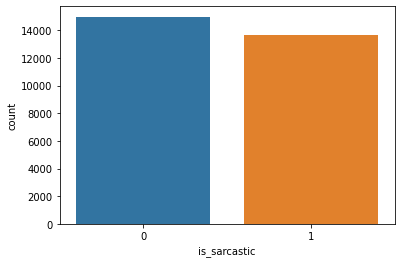

In [20]:
sns.countplot(sarcasm['is_sarcastic'])
sns.countplot(sarcasm2['is_sarcastic'])

In [21]:
nltk.download('stopwords')
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
sarcasm["headline"] = sarcasm["headline"].apply(clean)
sarcasm2["headline"] = sarcasm2["headline"].apply(clean)
print(sarcasm.head())
sarcasm2.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
                                            headline  is_sarcastic
0  former versac store clerk sue secret black cod...             0
1  roseann reviv catch thorni polit mood better wors             0
2  mom start fear son web seri closest thing gran...             1
3  boehner want wife listen come altern debtreduc...             1
4        jk rowl wish snape happi birthday magic way             0


,is_sarcastic,headline
0,1,thirtysometh scientist unveil doomsday clock h...
1,0,dem rep total nail congress fall short gender ...
2,0,eat veggi delici differ recip
3,1,inclement weather prevent liar get work
4,1,mother come pretti close use word stream correct


In [44]:
# First dataset training
data = sarcasm[["headline", "is_sarcastic"]]
x = np.array(data["headline"])
y = np.array(data["is_sarcastic"])

cv = CountVectorizer()
X = cv.fit_transform(x) # Fit the Data
# print(X.shape)
# print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


# Second dataset training
data2 = sarcasm2[["headline", "is_sarcastic"]]
x2 = np.array(data2["headline"])
y2 = np.array(data2["is_sarcastic"])

cv2 = CountVectorizer()
X2 = cv2.fit_transform(x2) # Fit the Data

# Dimensions need to match
X2 = X2[:26709, :18833]
y2 = y2[:26709]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=42)

# Neural Network

In [41]:
#Training on subset of dataset 1 and Testing on another mutually exlusive subset of dataset 1 
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=10000) #500 originally but did not converge
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [50]:
#Training on subset of dataset 2 and Testing on another mutually exlusive subset of dataset 2 
mlpc2 = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=10000) #500 originally but did not converge
mlpc2.fit(X_train2, y_train2)
pred_mlpc2 = mlpc2.predict(X_test2)

In [53]:
#Training on dataset 1 and testing on dataset 2
model = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=10000)
model.fit(X_train, y_train)
pred_model = model.predict(X_test)
#print(model.score(X_test, y_test))

In [58]:
#Training on dataset 2 and testing on dataset 1 
model2 = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=10000)
model2.fit(X_train2, y_train2)
pred_model2 = model2.predict(X_test)
#print(model2.score(X_test, y_test))

In [42]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79      2996
           1       0.74      0.70      0.72      2346

    accuracy                           0.76      5342
   macro avg       0.75      0.75      0.75      5342
weighted avg       0.76      0.76      0.76      5342

[[2407  589]
 [ 709 1637]]


In [51]:
print(classification_report(y_test2, pred_mlpc2))
print(confusion_matrix(y_test2, pred_mlpc2))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75      2766
           1       0.74      0.73      0.74      2576

    accuracy                           0.75      5342
   macro avg       0.75      0.75      0.75      5342
weighted avg       0.75      0.75      0.75      5342

[[2092  674]
 [ 684 1892]]


In [55]:
print(classification_report(y_test2, pred_model))
print(confusion_matrix(y_test2, pred_model))

              precision    recall  f1-score   support

           0       0.51      0.58      0.54      2766
           1       0.47      0.41      0.44      2576

    accuracy                           0.50      5342
   macro avg       0.49      0.49      0.49      5342
weighted avg       0.49      0.50      0.49      5342

[[1598 1168]
 [1527 1049]]


In [59]:
print(classification_report(y_test, pred_model2))
print(confusion_matrix(y_test, pred_model2))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57      2996
           1       0.45      0.45      0.45      2346

    accuracy                           0.52      5342
   macro avg       0.51      0.51      0.51      5342
weighted avg       0.52      0.52      0.52      5342

[[1722 1274]
 [1287 1059]]


# Accuracy Scores

In [43]:
cm = accuracy_score(y_test, pred_mlpc)
cm

0.7570198427555223

In [52]:
cm = accuracy_score(y_test2, pred_mlpc2)
cm

0.7457880943466866

# Single sentence predictors

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = mlpc.predict(data)
if output == 1:
    print('sarcastic')
else: 
    print ('genuine')